In [1]:
# Import library dasar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn untuk preprocessing dan evaluasi
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import (
    classification_report, confusion_matrix, accuracy_score,
    precision_score, recall_score, f1_score, roc_auc_score, roc_curve
)

# TensorFlow dan Keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from tensorflow.keras.callbacks import EarlyStopping

# Verifikasi versi TensorFlow
print(f"TensorFlow Version: {tf.__version__}")

TensorFlow Version: 2.18.0


In [2]:
# Load dataset
file_path = 'ALLFLOWMETER_HIKARI2021.csv'  # Ganti dengan path dataset yang sesuai
data = pd.read_csv(file_path)

# Tampilkan informasi dataset
print("Informasi Dataset:")
print(data.info())

# Menghapus nilai yang hilang
data.dropna(inplace=True)

# Encoding label target
label_column = 'traffic_category'  # Sesuaikan dengan nama kolom target
le = LabelEncoder()
data[label_column] = le.fit_transform(data[label_column])

# Pisahkan fitur dan target
X = data.drop(columns=[label_column])
y = data[label_column]

# Identifikasi dan hapus kolom non-numerik
non_numeric_columns = X.select_dtypes(include=['object']).columns
if len(non_numeric_columns) > 0:
    X.drop(columns=non_numeric_columns, inplace=True)
    print(f"Kolom non-numerik {non_numeric_columns} dihapus.")

# Normalisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Membagi data menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555278 entries, 0 to 555277
Data columns (total 88 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Unnamed: 0.1              555278 non-null  int64  
 1   Unnamed: 0                555278 non-null  int64  
 2   uid                       555278 non-null  object 
 3   originh                   555278 non-null  object 
 4   originp                   555278 non-null  int64  
 5   responh                   555278 non-null  object 
 6   responp                   555278 non-null  int64  
 7   flow_duration             555278 non-null  float64
 8   fwd_pkts_tot              555278 non-null  int64  
 9   bwd_pkts_tot              555278 non-null  int64  
 10  fwd_data_pkts_tot         555278 non-null  int64  
 11  bwd_data_pkts_tot         555278 non-null  int64  
 12  fwd_pkts_per_sec          555278 non-null  float64
 13  bwd_pkts_per_sec         

In [3]:
def create_model(optimizer='adam', dropout_rate=0.3):
    model = Sequential()
    model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(len(np.unique(y)), activation='softmax'))

    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [4]:
# Daftar hyperparameter untuk dicoba
optimizers = ['adam', 'sgd', 'rmsprop']
dropout_rates = [0.2, 0.3, 0.4]
epochs = 20
batch_size = 32

# Variabel untuk menyimpan hasil terbaik
best_accuracy = 0
best_params = {}
best_model = None

# Iterasi manual untuk setiap kombinasi hyperparameter
for optimizer in optimizers:
    for dropout_rate in dropout_rates:
        print(f"\nTraining model dengan optimizer={optimizer} dan dropout_rate={dropout_rate}")

        # Membuat model
        model = create_model(optimizer=optimizer, dropout_rate=dropout_rate)

        # Callback untuk early stopping
        early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

        # Melatih model
        history = model.fit(
            X_train, y_train,
            epochs=epochs,
            batch_size=batch_size,
            validation_split=0.2,
            callbacks=[early_stop],
            verbose=1
        )

        # Evaluasi model
        loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
        print(f"Validation Accuracy: {accuracy:.4f}")

        # Simpan model dengan performa terbaik
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_params = {'optimizer': optimizer, 'dropout_rate': dropout_rate}
            best_model = model

# Menampilkan hasil terbaik
print(f"\nBest Parameters: {best_params}")
print(f"Best Validation Accuracy: {best_accuracy:.4f}")


Training model dengan optimizer=adam dan dropout_rate=0.2


c:\Users\kulrz\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
11106/11106 ━━━━━━━━━━━━━━━━━━━━ 52s 5ms/step - accuracy: 0.9730 - loss: 0.0875 - val_accuracy: 0.9990 - val_loss: 0.0057
Epoch 2/20
11106/11106 ━━━━━━━━━━━━━━━━━━━━ 45s 4ms/step - accuracy: 0.9993 - loss: 0.0030 - val_accuracy: 0.9998 - val_loss: 5.9355e-04
Epoch 3/20
11106/11106 ━━━━━━━━━━━━━━━━━━━━ 71s 6ms/step - accuracy: 0.9995 - loss: 0.0028 - val_accuracy: 0.9997 - val_loss: 0.0049
Epoch 4/20
11106/11106 ━━━━━━━━━━━━━━━━━━━━ 76s 7ms/step - accuracy: 0.9995 - loss: 0.0041 - val_accuracy: 0.9998 - val_loss: 0.0012
Epoch 5/20
11106/11106 ━━━━━━━━━━━━━━━━━━━━ 75s 7ms/step - accuracy: 0.9997 - loss: 0.0120 - val_accuracy: 0.9999 - val_loss: 2.3191e-04
Epoch 6/20
11106/11106 ━━━━━━━━━━━━━━━━━━━━ 75s 7ms/step - accuracy: 0.9998 - loss: 0.0021 - val_accuracy: 0.9999 - val_loss: 1.8390e-04
Epoch 7/20
11106/11106 ━━━━━━━━━━━━━━━━━━━━ 73s 7ms/step - accuracy: 0.9997 - loss: 0.0024 - val_accuracy: 0.9999 - val_loss: 7.9400e-04
Epoch 8/20
11106/11106 ━━━━━━━━━━━━━━━━━━━━ 79s 7ms/s

3471/3471 ━━━━━━━━━━━━━━━━━━━━ 2s 617us/step

Confusion Matrix:


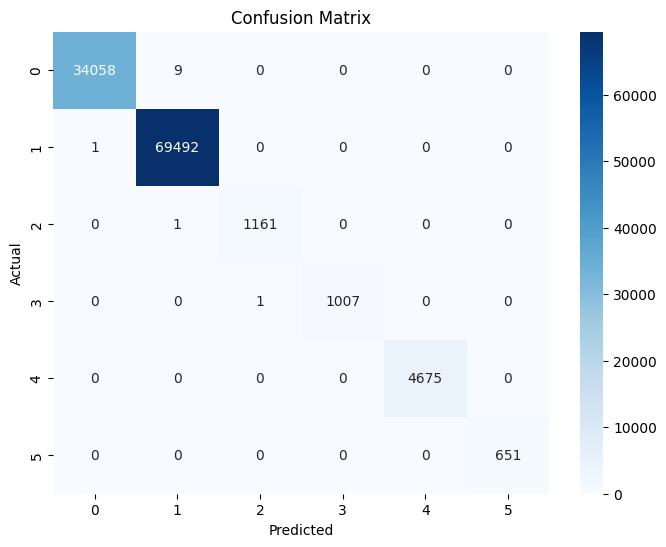


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     34067
           1       1.00      1.00      1.00     69493
           2       1.00      1.00      1.00      1162
           3       1.00      1.00      1.00      1008
           4       1.00      1.00      1.00      4675
           5       1.00      1.00      1.00       651

    accuracy                           1.00    111056
   macro avg       1.00      1.00      1.00    111056
weighted avg       1.00      1.00      1.00    111056


=== Evaluation Metrics ===
Accuracy: 0.9999
Precision: 0.9999
Recall: 0.9999
F1 Score: 0.9999


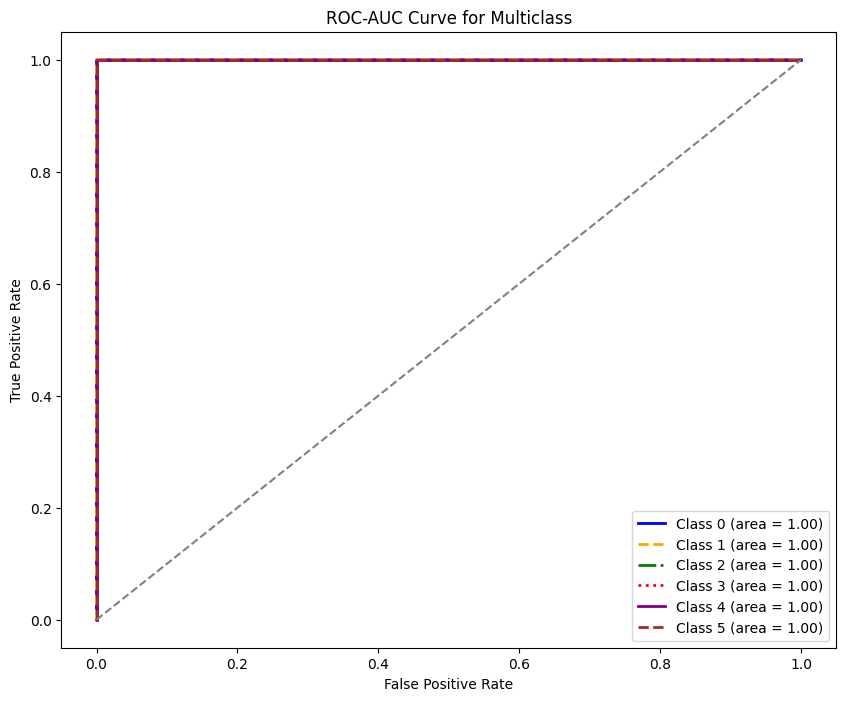


Overall ROC-AUC Score: 1.0000


In [5]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import (
    classification_report, confusion_matrix, accuracy_score,
    precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
)

# Binarisasi y_test untuk multiclass ROC-AUC
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_bin.shape[1]  # Mendefinisikan jumlah kelas

# Prediksi probabilitas dari model terbaik
y_pred_prob = best_model.predict(X_test)

# Menghitung prediksi akhir
y_pred = np.argmax(y_pred_prob, axis=1)

# Confusion Matrix
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Metrik Evaluasi Tambahan
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("\n=== Evaluation Metrics ===")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Menghitung ROC-AUC untuk setiap kelas
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC-AUC Curve untuk setiap kelas
plt.figure(figsize=(10, 8))
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown']
line_styles = ['-', '--', '-.', ':', '-', '--']

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, color=colors[i % len(colors)], linestyle=line_styles[i % len(line_styles)],
             label=f'Class {i} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve for Multiclass')
plt.legend(loc='lower right')
plt.show()

# ROC-AUC Score untuk seluruh kelas
overall_roc_auc = roc_auc_score(y_test_bin, y_pred_prob, multi_class='ovr')
print(f"\nOverall ROC-AUC Score: {overall_roc_auc:.4f}")